In [ ]:
from imutils import paths
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
from torchvision import models
import torch
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

import keras,math
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D,BatchNormalization
from keras.layers import Dense, Dropout
from keras.models import Model

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics


import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
#from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Set manual seed for reproducibility
torch.manual_seed(42)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the dataset
dataset_path = "/content/drive/MyDrive/Soft Com/Blood cell Cancer [ALL]"

In [ ]:
# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
base_path = "/content/drive/MyDrive/Soft Com/Blood cell Cancer [ALL]"
classes = ["Benign", "[Malignant] early Pre-B", "[Malignant] Pre-B","[Malignant] Pro-B"]


total_samples = len(list(paths.list_images(base_path)))
print(f'Number of samples in dataset: {total_samples}\n')

print('Number of samples in each class:\n')

for cls in classes:
    num_samples = len(list(paths.list_images(f"{base_path}/{cls}")))
    print(f"# {cls}: {num_samples}")

Number of samples in dataset: 3242

Number of samples in each class:

# Benign: 512
# [Malignant] early Pre-B: 979
# [Malignant] Pre-B: 955
# [Malignant] Pro-B: 796


<ipython-input-44-a3d37d352eb3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette=colors)


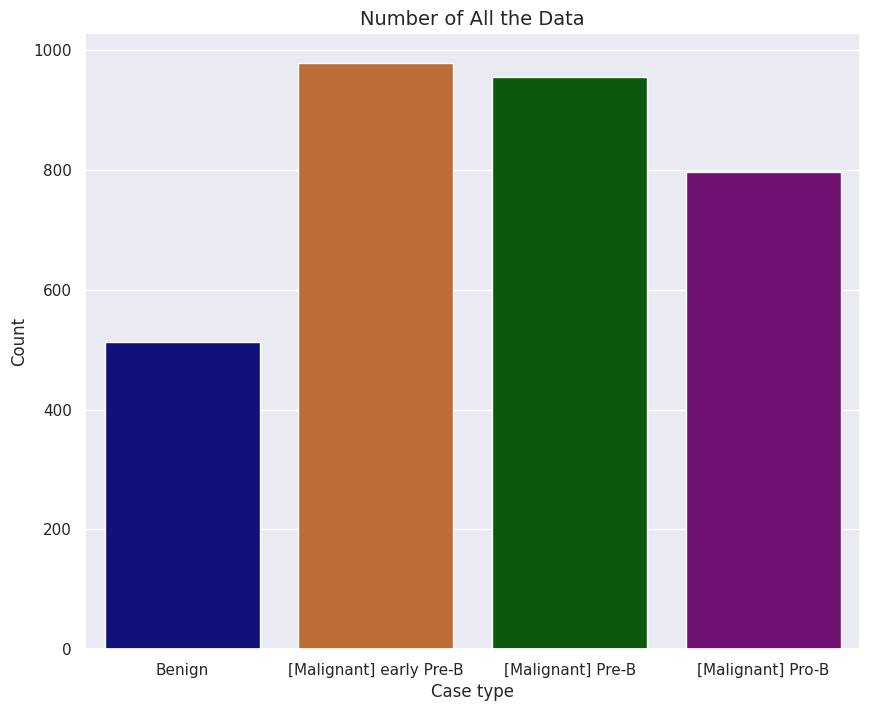

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/Soft Com/Blood cell Cancer [ALL]"
classes = ["Benign", "[Malignant] early Pre-B", "[Malignant] Pre-B","[Malignant] Pro-B"]

# Count the number of images in each class
counts = []
for cls in classes:
    num_samples = len(os.listdir(os.path.join(base_path, cls)))
    counts.append(num_samples)

# Define a list of colors for the bars
colors = ['darkblue', 'chocolate', 'darkgreen', 'purple']

# Plot the counts
sns.set(style="darkgrid")
plt.figure(figsize=(10,8))
sns.barplot(x=classes, y=counts, palette=colors)
plt.title('Number of All the Data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [ ]:
# Load the dataset
dataset = ImageFolder(root=dataset_path, transform=transform)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from torch.utils.data import DataLoader, Subset

def split_dataset(dataset, test_size=0.2, val_size=0.5, batch_size=32, random_state=42):
    # Set a manual seed for reproducibility
    torch.manual_seed(random_state)

    # Get labels and targets for stratified splitting
    labels = [label for _, label in dataset.samples]
    targets = dataset.targets

    # Use StratifiedShuffleSplit to split indices while maintaining stratification
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)

    train_idx, test_idx = next(sss.split(labels, targets))
    train_data = Subset(dataset, train_idx)
    test_data = Subset(dataset, test_idx)

    # Further split the test set into validation and test sets
    sss_val = StratifiedShuffleSplit(n_splits=1, test_size=val_size, random_state=random_state)
    val_idx, test_idx = next(sss_val.split([labels[i] for i in test_idx], [targets[i] for i in test_idx]))
    val_data = Subset(test_data, val_idx)
    test_data = Subset(test_data, test_idx)

    # Verify the lengths of the sets
    print("Train set length:", len(train_data))
    print("Validation set length:", len(val_data))
    print("Test set length:", len(test_data))

    # Create DataLoader instances
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader

# Usage
train_loader, val_loader, test_loader = split_dataset(dataset, test_size=0.2, val_size=0.5, batch_size=32, random_state=42)


Train set length: 2593
Validation set length: 324
Test set length: 325


In [ ]:
!pip install tensorflow

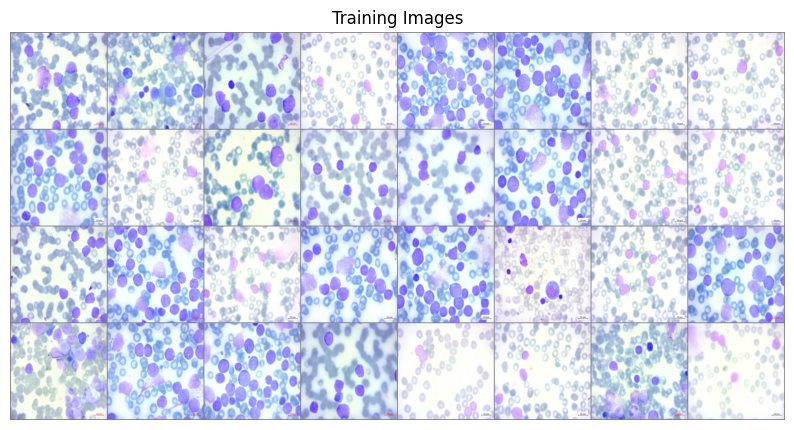

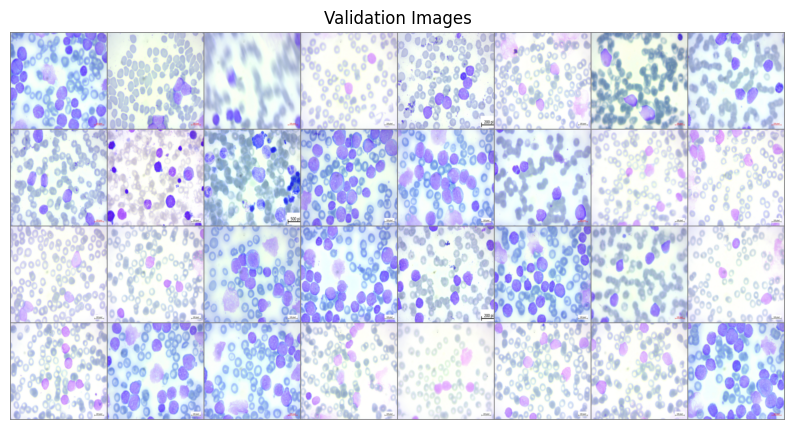

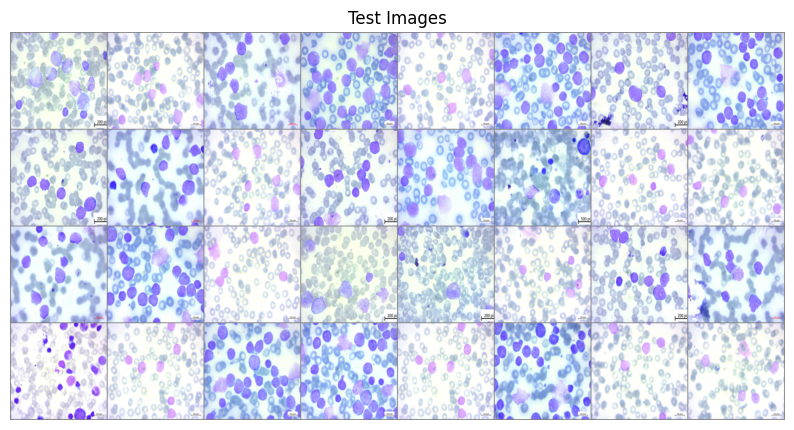

In [ ]:


import torchvision

def load_images(loader):
    # Get one batch of data
    for images, _ in loader:
        return images

def display_images(images, title):
    # Create a grid of images
    img_grid = torchvision.utils.make_grid(images)

    # Denormalize images
    img_grid = img_grid / 2 + 0.5  # unnormalize

    # Convert to numpy and transpose the axes
    npimg = np.transpose(img_grid.numpy(), (1, 2, 0))

    # Display the images
    plt.figure(figsize=(10, 10))
    plt.imshow(npimg)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display images from each dataset
train_images = load_images(train_loader)
display_images(train_images, 'Training Images')

val_images = load_images(val_loader)
display_images(val_images, 'Validation Images')

test_images = load_images(test_loader)
display_images(test_images, 'Test Images')



In [ ]:
from imutils import paths
import os
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split

import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import morphology
import time

import keras,math
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D,BatchNormalization
from keras.layers import Dense,Dropout
from keras.models import Model

import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

import tensorflow as tf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics

In [ ]:
from sklearn.cluster import KMeans
from scipy import ndimage as ndi
from skimage import morphology
import cv2
import os
import time

# Initialize counter
p = 0

# Start timer
tic = time.perf_counter()

# Loop over images in train loader
for images, labels in train_loader:
    for i in range(len(images)):
        # Get image and label
        image = images[i].numpy()
        label = labels[i]



        # Move the channel dimension to the front
        image = np.transpose(image, (1, 2, 0))

        # Now you can convert the color space
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Perform segmentation
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
        l, a, _ = cv2.split(image_lab)
        i2 = a.reshape(a.shape[0]*a.shape[1], 1)
        km = KMeans(n_clusters=7, random_state=0).fit(i2)
        p2s = km.cluster_centers_[km.labels_]
        ic = p2s.reshape(a.shape[0], a.shape[1])
        ic = ic.astype(np.uint8)
        _, t = cv2.threshold(ic, 141, 255, cv2.THRESH_BINARY)
        fh = ndi.binary_fill_holes(t)
        m1 = morphology.remove_small_objects(fh, 200)
        m2 = morphology.remove_small_holes(m1, 250)
        m2 = m2.astype(np.uint8)
        out = cv2.bitwise_and(image, image, mask=m2)

        # Convert segmented image back to tensor
        out = torch.from_numpy(cv2.cvtColor(out, cv2.COLOR_RGB2BGR))


        # Transpose the dimensions back to [3, 224, 224]
        out = out.permute(2, 0, 1)

        # Replace original image with preprocessed image
        images[i] = out
        p += 1

# Stop timer
toc = time.perf_counter()

# Print processing time
print(f"{p} samples processed in {((toc - tic)/60)} minutes")


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/py

2593 samples processed in 30.115087310783338 minutes


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


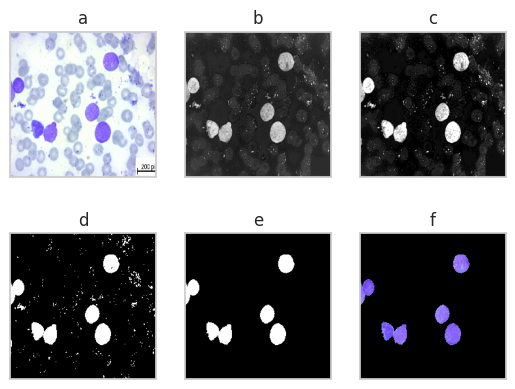

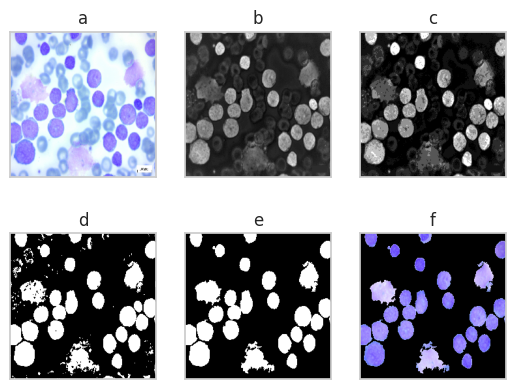

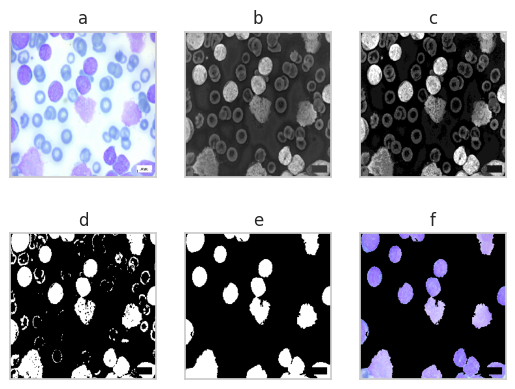

In [ ]:
data_dir = '/content/drive/MyDrive/Soft Com/Blood cell Cancer [ALL]'
data_list = sorted(list(paths.list_images(data_dir)))

#----- print some samples of training dataset -------

n= 3

o_img=[]
a_img=[]
c_img=[]
b_img=[]
m_img=[]
out_img=[]

random.seed(865)
random.shuffle(data_list)

for img in data_list[:n]:
    i= cv2.imread(img)
    i= cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    i= cv2.resize(i,(224,224))
    o_img.append(i)
    i_lab = cv2.cvtColor(i, cv2.COLOR_RGB2LAB)
    l,a,b = cv2.split(i_lab)
    a_img.append(a)
    i2 = a.reshape(a.shape[0]*a.shape[1],1)
    km= KMeans(n_clusters=7, random_state=0).fit(i2)
    p2s= km.cluster_centers_[km.labels_]
    ic= p2s.reshape(a.shape[0],a.shape[1])
    ic = ic.astype(np.uint8)
    c_img.append(ic)
    r,t = cv2.threshold(ic,141,255 ,cv2.THRESH_BINARY)
    b_img.append(t)
    fh = ndi.binary_fill_holes(t)
    m1 = morphology.remove_small_objects(fh, 200)
    m2 = morphology.remove_small_holes(m1,250)
    #m2 = ndi.binary_fill_holes(m2)
    #m1 = m1.astype(np.uint8)
    #m1_imgs.append(m1)
    m2 = m2.astype(np.uint8)
    m_img.append(m2)
    out = cv2.bitwise_and(i, i, mask=m2)
    out_img.append(out)

for j in range(n):
    for t in range(1):
        #print('=>',j+1,':')
        plt.subplot(2,3,1+t),plt.imshow(o_img[j])
        plt.title('a'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,2+t),plt.imshow(a_img[j],'gray')
        plt.title('b'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,3+t),plt.imshow(c_img[j],'gray')
        plt.title('c'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,4+t),plt.imshow(b_img[j],'gray')
        plt.title('d'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,5+t),plt.imshow(m_img[j],'gray')
        plt.title('e'),plt.xticks([]),plt.yticks([])
        plt.subplot(2,3,6+t),plt.imshow(out_img[j])
        plt.title('f'),plt.xticks([]),plt.yticks([])
    plt.show()

In [ ]:
pip install opencv-python scikit-image

# **MODEL TRAIN**

In [ ]:
from torchvision import models

# Define the model (DenseNet)
model = models.densenet121(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier part of the model
model.classifier = nn.Linear(1024, len(classes))  # The input size should match the output size of the features part of the model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 97.2MB/s]


In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters())

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], "
                  f"Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Accuracy: {correct_train / total_train * 100:.2f}%, "
          f"Validation Accuracy: {correct_val / total_val * 100:.2f}%, "
          f"Validation Loss: {val_loss / len(val_loader):.4f}")


Epoch [1/10], Batch [10/82], Loss: 1.1630
Epoch [1/10], Batch [20/82], Loss: 0.7484
Epoch [1/10], Batch [30/82], Loss: 0.5835
Epoch [1/10], Batch [40/82], Loss: 0.4342
Epoch [1/10], Batch [50/82], Loss: 0.3395
Epoch [1/10], Batch [60/82], Loss: 0.3002
Epoch [1/10], Batch [70/82], Loss: 0.2842
Epoch [1/10], Batch [80/82], Loss: 0.2147
Epoch [1/10], Train Accuracy: 87.62%, Validation Accuracy: 94.75%, Validation Loss: 0.2244
Epoch [2/10], Batch [10/82], Loss: 0.2717
Epoch [2/10], Batch [20/82], Loss: 0.1874
Epoch [2/10], Batch [30/82], Loss: 0.2106
Epoch [2/10], Batch [40/82], Loss: 0.1759
Epoch [2/10], Batch [50/82], Loss: 0.1468
Epoch [2/10], Batch [60/82], Loss: 0.1704
Epoch [2/10], Batch [70/82], Loss: 0.1552
Epoch [2/10], Batch [80/82], Loss: 0.1255
Epoch [2/10], Train Accuracy: 96.80%, Validation Accuracy: 96.30%, Validation Loss: 0.1469
Epoch [3/10], Batch [10/82], Loss: 0.1425
Epoch [3/10], Batch [20/82], Loss: 0.1608
Epoch [3/10], Batch [30/82], Loss: 0.1282
Epoch [3/10], Batch 

Test Accuracy: 98.7692%, Test Loss: 0.0313
F1 Score: 0.9877, Recall: 0.9877, Precision: 0.9878


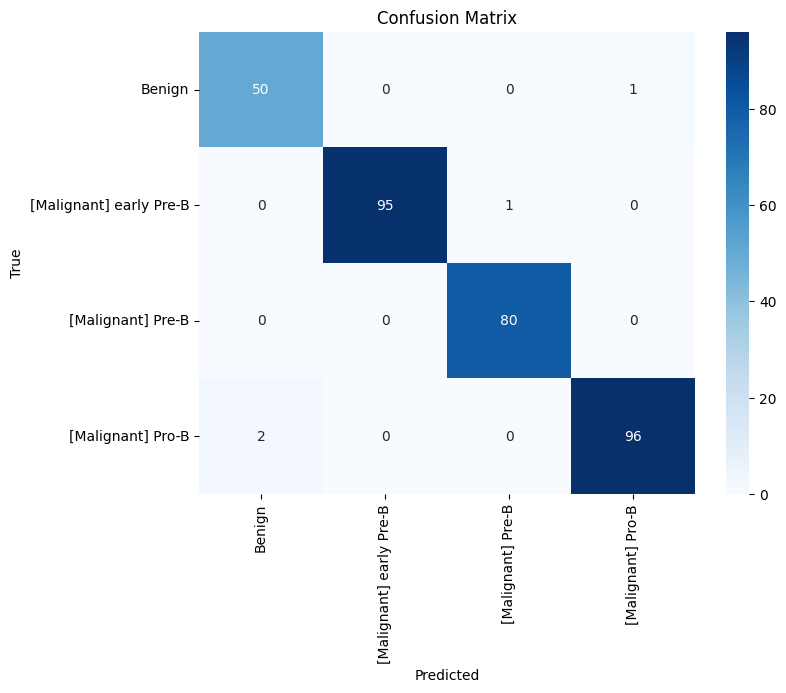

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Test the model
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

print(f"Test Accuracy: {correct_test / total_test * 100:.4f}%, "
      f"Test Loss: {test_loss / len(test_loader):.4f}")

# Calculate performance metrics
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")

# Plot confusion matrix
labels = ['Benign', '[Malignant] early Pre-B', '[Malignant] Pre-B','[Malignant] Pro-B']
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Define the model (ResNet)
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier part of the model
model.fc = nn.Linear(2048, len(classes))  # The input size should match the output size of the features part of the model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 86.0MB/s]


In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters())


In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], "
                  f"Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Accuracy: {correct_train / total_train * 100:.2f}%, "
          f"Validation Accuracy: {correct_val / total_val * 100:.2f}%, "
          f"Validation Loss: {val_loss / len(val_loader):.4f}")


Epoch [1/10], Batch [10/82], Loss: 1.1832
Epoch [1/10], Batch [20/82], Loss: 0.7111
Epoch [1/10], Batch [30/82], Loss: 0.5319
Epoch [1/10], Batch [40/82], Loss: 0.4282
Epoch [1/10], Batch [50/82], Loss: 0.2836
Epoch [1/10], Batch [60/82], Loss: 0.2772
Epoch [1/10], Batch [70/82], Loss: 0.2350
Epoch [1/10], Batch [80/82], Loss: 0.2124
Epoch [1/10], Train Accuracy: 85.11%, Validation Accuracy: 93.52%, Validation Loss: 0.2310
Epoch [2/10], Batch [10/82], Loss: 0.2612
Epoch [2/10], Batch [20/82], Loss: 0.1783
Epoch [2/10], Batch [30/82], Loss: 0.1851
Epoch [2/10], Batch [40/82], Loss: 0.1524
Epoch [2/10], Batch [50/82], Loss: 0.1430
Epoch [2/10], Batch [60/82], Loss: 0.1600
Epoch [2/10], Batch [70/82], Loss: 0.1506
Epoch [2/10], Batch [80/82], Loss: 0.1019
Epoch [2/10], Train Accuracy: 96.26%, Validation Accuracy: 96.30%, Validation Loss: 0.1536
Epoch [3/10], Batch [10/82], Loss: 0.1835
Epoch [3/10], Batch [20/82], Loss: 0.1154
Epoch [3/10], Batch [30/82], Loss: 0.1556
Epoch [3/10], Batch 

Test Accuracy: 99.0769%, Test Loss: 0.0342
F1 Score: 0.9907, Recall: 0.9908, Precision: 0.9908


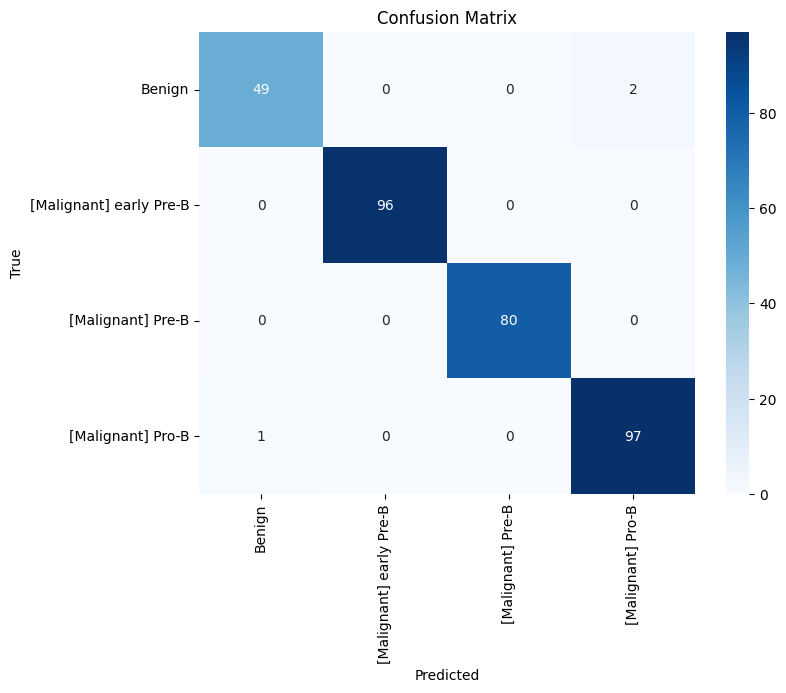

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Test the model
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

print(f"Test Accuracy: {correct_test / total_test * 100:.4f}%, "
      f"Test Loss: {test_loss / len(test_loader):.4f}")

# Calculate performance metrics
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")

# Plot confusion matrix
labels = ['Benign', '[Malignant] early Pre-B', '[Malignant] Pre-B','[Malignant] Pro-B']
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Import necessary libraries
import torch.nn as nn
from torchvision import models

# Define the model (AlexNet)
model = models.alexnet(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier part of the model
model.classifier[6] = nn.Linear(4096, len(classes))  # The input size should match the output size of the features part of the model


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 43.5MB/s]


In [ ]:
# Import necessary libraries
import torch.nn as nn
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters())


In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], "
                  f"Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Accuracy: {correct_train / total_train * 100:.2f}%, "
          f"Validation Accuracy: {correct_val / total_val * 100:.2f}%, "
          f"Validation Loss: {val_loss / len(val_loader):.4f}")


Epoch [1/10], Batch [10/82], Loss: 0.9241
Epoch [1/10], Batch [20/82], Loss: 0.4195
Epoch [1/10], Batch [30/82], Loss: 0.3716
Epoch [1/10], Batch [40/82], Loss: 0.3457
Epoch [1/10], Batch [50/82], Loss: 0.2903
Epoch [1/10], Batch [60/82], Loss: 0.1901
Epoch [1/10], Batch [70/82], Loss: 0.2493
Epoch [1/10], Batch [80/82], Loss: 0.2434
Epoch [1/10], Train Accuracy: 86.85%, Validation Accuracy: 92.28%, Validation Loss: 0.3655
Epoch [2/10], Batch [10/82], Loss: 0.2572
Epoch [2/10], Batch [20/82], Loss: 0.2601
Epoch [2/10], Batch [30/82], Loss: 0.2355
Epoch [2/10], Batch [40/82], Loss: 0.2573
Epoch [2/10], Batch [50/82], Loss: 0.2174
Epoch [2/10], Batch [60/82], Loss: 0.1719
Epoch [2/10], Batch [70/82], Loss: 0.2480
Epoch [2/10], Batch [80/82], Loss: 0.2058
Epoch [2/10], Train Accuracy: 91.13%, Validation Accuracy: 91.98%, Validation Loss: 0.2739
Epoch [3/10], Batch [10/82], Loss: 0.2495
Epoch [3/10], Batch [20/82], Loss: 0.2501
Epoch [3/10], Batch [30/82], Loss: 0.1935
Epoch [3/10], Batch 

Test Accuracy: 96.0000%, Test Loss: 0.0996
F1 Score: 0.9594, Recall: 0.9600, Precision: 0.9615


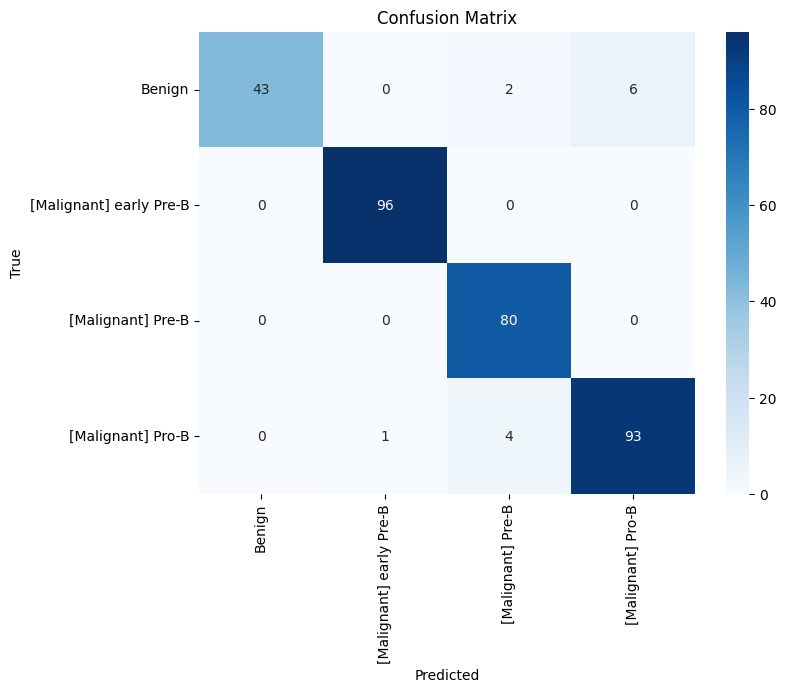

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Test the model
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

print(f"Test Accuracy: {correct_test / total_test * 100:.4f}%, "
      f"Test Loss: {test_loss / len(test_loader):.4f}")

# Calculate performance metrics
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")

# Plot confusion matrix
labels = ['Benign', '[Malignant] early Pre-B', '[Malignant] Pre-B','[Malignant] Pro-B']
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
pip install efficientnet_pytorch


  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=f32b4e45532f93b2aca4bc3047d79b0d163ddc29515ab62b98e0ad2e543b0c70
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch


In [ ]:
# Import necessary libraries
import torch.nn as nn
from efficientnet_pytorch import EfficientNet

# Define the model (EfficientNet-B0)
model = EfficientNet.from_pretrained('efficientnet-b0')
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier part of the model
num_ftrs = model._fc.in_features
model._fc = nn.Linear(num_ftrs, len(classes))  # The input size should match the output size of the features part of the model


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 292MB/s]


Loaded pretrained weights for efficientnet-b0


In [ ]:

# Define the learning rate
learning_rate = 0.001

# Define the weight decay (L2 regularization)
weight_decay = 0.0005

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model._fc.parameters(), lr=learning_rate, weight_decay=weight_decay)


In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], "
                  f"Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Accuracy: {correct_train / total_train * 100:.2f}%, "
          f"Validation Accuracy: {correct_val / total_val * 100:.2f}%, "
          f"Validation Loss: {val_loss / len(val_loader):.4f}")


Epoch [1/10], Batch [10/82], Loss: 1.2012
Epoch [1/10], Batch [20/82], Loss: 0.8547
Epoch [1/10], Batch [30/82], Loss: 0.7168
Epoch [1/10], Batch [40/82], Loss: 0.5774
Epoch [1/10], Batch [50/82], Loss: 0.4663
Epoch [1/10], Batch [60/82], Loss: 0.4024
Epoch [1/10], Batch [70/82], Loss: 0.3397
Epoch [1/10], Batch [80/82], Loss: 0.3213
Epoch [1/10], Train Accuracy: 83.15%, Validation Accuracy: 54.94%, Validation Loss: 1.0815
Epoch [2/10], Batch [10/82], Loss: 0.2446
Epoch [2/10], Batch [20/82], Loss: 0.2743
Epoch [2/10], Batch [30/82], Loss: 0.2735
Epoch [2/10], Batch [40/82], Loss: 0.2511
Epoch [2/10], Batch [50/82], Loss: 0.2144
Epoch [2/10], Batch [60/82], Loss: 0.2286
Epoch [2/10], Batch [70/82], Loss: 0.1889
Epoch [2/10], Batch [80/82], Loss: 0.1725
Epoch [2/10], Train Accuracy: 95.33%, Validation Accuracy: 75.62%, Validation Loss: 0.6951
Epoch [3/10], Batch [10/82], Loss: 0.2071
Epoch [3/10], Batch [20/82], Loss: 0.1795
Epoch [3/10], Batch [30/82], Loss: 0.1783
Epoch [3/10], Batch 

Test Accuracy: 99.0769%, Test Loss: 0.0366
F1 Score: 0.9908, Recall: 0.9908, Precision: 0.9908


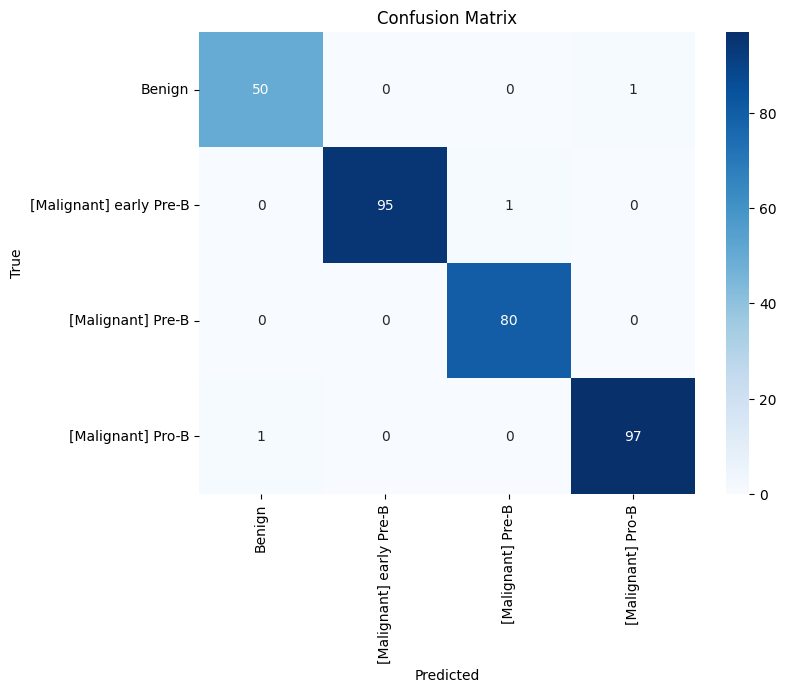

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Test the model
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

print(f"Test Accuracy: {correct_test / total_test * 100:.4f}%, "
      f"Test Loss: {test_loss / len(test_loader):.4f}")

# Calculate performance metrics
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")

# Plot confusion matrix
labels = ['Benign', '[Malignant] early Pre-B', '[Malignant] Pre-B','[Malignant] Pro-B']
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Import necessary libraries
import torch.nn as nn
from torchvision import models

# Define the model (GoogLeNet)
model = models.googlenet(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the classifier part of the model
model.fc = nn.Linear(1024, len(classes))  # The input size should match the output size of the features part of the model


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 51.5MB/s]


In [ ]:
# Import necessary libraries
import torch.nn as nn
import torch.optim as optim

# Define the learning rate
learning_rate = 0.001

# Define the weight decay (L2 regularization)
weight_decay = 0.0005

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate, weight_decay=weight_decay)


In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        if (batch_idx + 1) % 10 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], "
                  f"Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], "
          f"Train Accuracy: {correct_train / total_train * 100:.2f}%, "
          f"Validation Accuracy: {correct_val / total_val * 100:.2f}%, "
          f"Validation Loss: {val_loss / len(val_loader):.4f}")


Epoch [1/10], Batch [10/82], Loss: 1.2331
Epoch [1/10], Batch [20/82], Loss: 0.9562
Epoch [1/10], Batch [30/82], Loss: 0.7623
Epoch [1/10], Batch [40/82], Loss: 0.6475
Epoch [1/10], Batch [50/82], Loss: 0.5155
Epoch [1/10], Batch [60/82], Loss: 0.4961
Epoch [1/10], Batch [70/82], Loss: 0.3970
Epoch [1/10], Batch [80/82], Loss: 0.3966
Epoch [1/10], Train Accuracy: 81.45%, Validation Accuracy: 95.68%, Validation Loss: 0.3723
Epoch [2/10], Batch [10/82], Loss: 0.3828
Epoch [2/10], Batch [20/82], Loss: 0.3379
Epoch [2/10], Batch [30/82], Loss: 0.3361
Epoch [2/10], Batch [40/82], Loss: 0.3013
Epoch [2/10], Batch [50/82], Loss: 0.2984
Epoch [2/10], Batch [60/82], Loss: 0.2744
Epoch [2/10], Batch [70/82], Loss: 0.2418
Epoch [2/10], Batch [80/82], Loss: 0.2909
Epoch [2/10], Train Accuracy: 93.25%, Validation Accuracy: 96.60%, Validation Loss: 0.2317
Epoch [3/10], Batch [10/82], Loss: 0.2587
Epoch [3/10], Batch [20/82], Loss: 0.2298
Epoch [3/10], Batch [30/82], Loss: 0.2177
Epoch [3/10], Batch 

Test Accuracy: 98.4615%, Test Loss: 0.0732
F1 Score: 0.9846, Recall: 0.9846, Precision: 0.9851


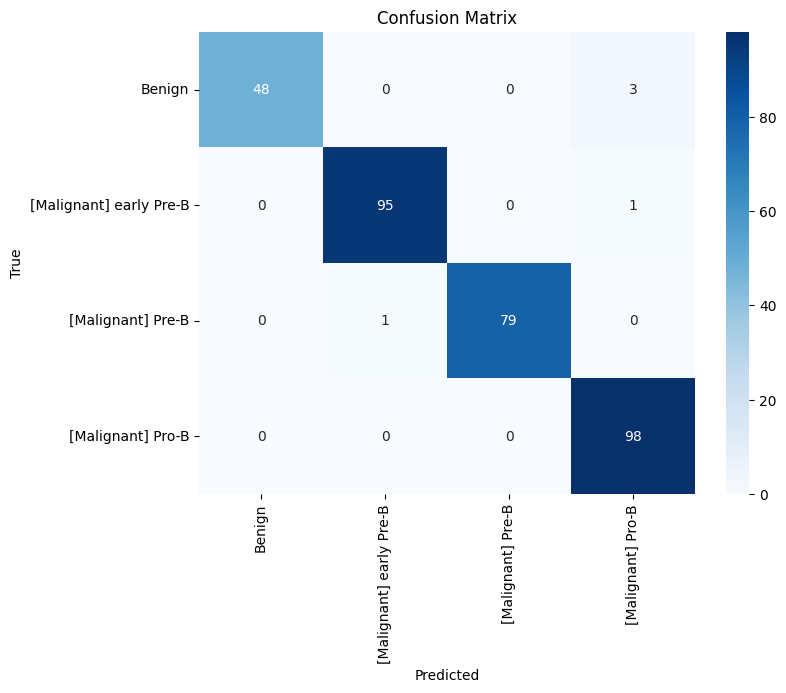

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Test the model
model.eval()
test_loss = 0.0
correct_test = 0
total_test = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

print(f"Test Accuracy: {correct_test / total_test * 100:.4f}%, "
      f"Test Loss: {test_loss / len(test_loader):.4f}")

# Calculate performance metrics
f1 = f1_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')

print(f"F1 Score: {f1:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}")

# Plot confusion matrix
labels = ['Benign', '[Malignant] early Pre-B', '[Malignant] Pre-B','[Malignant] Pro-B']
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-23-994c7013cc0e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=df_sorted, palette="viridis")


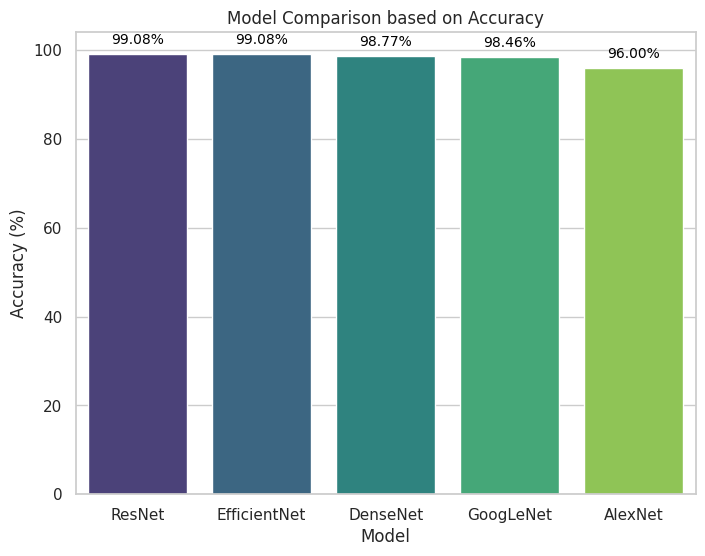

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with model information
data = {
    'Model': ['ResNet', 'EfficientNet', 'DenseNet', 'GoogLeNet', 'AlexNet'],
    'Accuracy': [99.0769, 99.0769, 98.7692, 98.4615, 96.0]
}

df = pd.DataFrame(data)

# Sort the DataFrame based on Accuracy in descending order
df_sorted = df.sort_values(by='Accuracy', ascending=False)

# Set up the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a bar plot
ax = sns.barplot(x='Model', y='Accuracy', data=df_sorted, palette="viridis")

# Add labels and title
ax.set(xlabel='Model', ylabel='Accuracy (%)', title='Model Comparison based on Accuracy')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Show the plot
plt.show()
